In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ZOEE.modules.configuration import importer, add_sellersparameters, parameterinterpolatorstepwise
from ZOEE.modules.variables import variable_importer, Vars, Base
#from ZOEE import update_plotstyle, moving_average
from ZOEE.modules.rk4 import rk4alg

In [2]:
configuration=importer('EBM0D_volcanic_config.ini')

variable_importer(configuration,control=True)
Time_Spinup,ZMT_Spinup,GMT_Spinup=rk4alg(configuration)

variable_importer(configuration,control=False)
Vars.T=ZMT_Spinup[-1]
Time,ZMT,GMT=rk4alg(configuration)

Loading Configuration from: ../config/EBM0D_volcanic_config.ini
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.
0D


Eq. State reached after 4003 steps, within 0.19429326057434082 seconds

0D


(0.0, 1.0)

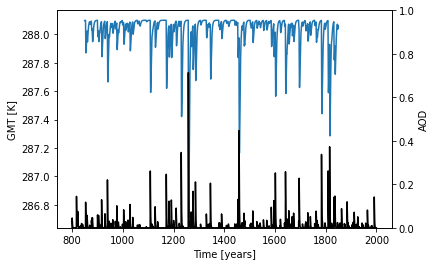

In [7]:
import ZOEE.modules.constants as const
plt.plot(Time[1:]/const.time_sec_year,GMT[1:])
plt.xlabel('Time [years]')
plt.ylabel('GMT [K]')

ax2 = plt.twinx()
ax2.plot(Vars.ExternalInput[0][0]/const.time_sec_year,Vars.ExternalInput[0][1]/-20, c='k')
plt.xlabel('Time [years]')
plt.ylabel('AOD')
plt.ylim(0,1)